In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
py.offline.init_notebook_mode(connected=True)
%matplotlib inline

##Dear Grader: IF you cannot see our graphs, please remember to pip all the libraries, including matplotlib and plotly... 

Breakfast is an important meal and cereal is a breakfast option that is both fast and easy to ration. For health concious people who do not want to go through the task of prepping meals to go can look to cereals for an easy on-th-go option. Comparing and visualizing relationships between micro and macro nutrients is important for people who wish to fine tune a diet to meet their health goals.

In [2]:
data=pd.read_csv('breakfast_cereals.csv')

In [3]:
data.head(5)

,Brand Name,Manufacturer,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugar,Potassium,Vitamins
0,100% Bran,Nabisco,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0
1,100% Natural Bran,Quaker Oats,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0
2,All-Bran,Kelloggs,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0
3,All-Bran with Extra Fiber,Kelloggs,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0
4,Apple Cinnamon Cheerios,General Mills,110.0,2.0,2.0,180.0,1.5,10.5,10.0,70.0,25.0


In [4]:
data.describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbohydrates,Sugar,Potassium,Vitamins
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,104.078082,2.438356,0.953425,157.926027,2.101370,14.527397,6.776712,93.635616,27.661644
std,14.191882,1.054044,0.988557,80.322520,2.345237,4.247328,4.075146,64.489447,20.573862
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,20.000000,0.000000
25%,100.000000,2.000000,0.000000,128.000000,1.000000,11.300000,3.000000,40.000000,25.000000
50%,107.700000,2.000000,1.000000,165.400000,2.000000,14.000000,6.000000,90.000000,25.000000
75%,110.000000,3.000000,1.000000,210.000000,3.000000,17.000000,10.000000,115.000000,25.000000
max,150.000000,6.000000,5.000000,320.000000,14.000000,26.000000,15.000000,330.000000,100.000000


In [5]:
import csv
import operator
sample = open('breakfast_cereals.csv')
csv1 = csv.reader(sample, delimiter = ',')
sorted_cereals = sorted(csv1, key=operator.itemgetter(1)) #sort by Manufacturer Name (we know there are 6)

In [6]:
change = " "
for i in range(73):
    if (change != (sorted_cereals[i][1])):
        print ("Manufacturer:", sorted_cereals[i][1], ", Index:", i)
        change = sorted_cereals[i][1]

Manufacturer: General Mills , Index: 0
Manufacturer: Kelloggs , Index: 22
Manufacturer: Manufacturer , Index: 45
Manufacturer: Nabisco , Index: 46
Manufacturer: Post , Index: 51
Manufacturer: Quaker Oats , Index: 60
Manufacturer: Ralston Purina , Index: 67


In [7]:
header = ['Brand Name', 'Manufacturer', 'Calories', 'Protein', 'Fat', 'Sodium', 'Fiber', 'Carbohydrates', 'Sugar', 'Potassium', 'Vitamins']
df = pd.DataFrame(sorted_cereals)

In [8]:
df.columns = header
cereals_df = df.drop([45])

In [9]:
import plotly.graph_objs as go

In [10]:
df1= cereals_df.iloc[:22,:] #General Mills 22
df2= cereals_df.iloc[22:45,:] #Kelloggs 
df3= cereals_df.iloc[45:50,:] #Nabisco (46 start)
df4= cereals_df.iloc[50:59,:] #Post
df5= cereals_df.iloc[59:66,:] #Quaker Oats
df6= cereals_df.iloc[66:73,:] #Ralston Purina

In [11]:
doc = df1.groupby(['Sugar','Fat']).size().reset_index(name='Count')
print (doc) #TODO: try to add a count

   Sugar  Fat  Count
0    1.0  2.0      1
1   10.0  1.0      2
2   10.0  2.0      1
3   12.0  1.0      2
4   13.0  1.0      2
5    3.0  1.0      5
6    6.0  1.0      1
7    6.0  1.5      1
8    7.0  2.0      1
9    8.0  1.0      1
10   8.0  1.6      1
11   8.0  2.0      1
12   9.0  1.0      1
13   9.0  3.0      1
14   9.3  0.7      1


In [12]:
trace1 = go.Scatter(
    #x=x-axis
    x= df1.Sugar,
    #y=y-axis
    y= df1.Fat,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='General Mills',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(12, 112, 212, 0.8)'),
    #the hover text
    text=df1.Manufacturer)
trace2 = go.Scatter(
    x=df2.Sugar,
    y=df2.Fat,
    mode='markers',
    name='Kelloggs',
    marker=dict(color = 'rgba(11, 209, 208, 0.8)'),
    text=df2.Manufacturer)
trace3 = go.Scatter(
    x=df3.Sugar,
    y=df3.Fat,
    mode='markers',
    name='Nabisco',
    marker=dict(color = 'rgba(183, 98, 65, 0.8)'),
    text=df3.Manufacturer)
trace4 = go.Scatter(
    x=df4.Sugar,
    y=df4.Fat,
    mode='markers',
    name='Post',
    marker=dict(color = 'rgba(23, 50, 170, 0.8)'),
    text=df4.Manufacturer)
trace5 = go.Scatter(
    x=df5.Sugar,
    y=df5.Fat,
    mode='markers',
    name='Quaker Oats',
    marker=dict(color = 'rgba(123, 123, 10, 0.8)'),
    text=df5.Manufacturer)
trace6 = go.Scatter(
    x=df6.Sugar,
    y=df6.Fat,
    mode='markers',
    name='Ralston Purina',
    marker=dict(color = 'rgba(80, 198, 65, 0.8)'),
    text=df6.Manufacturer)

In [13]:
data_list=[trace1,trace2,trace3,trace4,trace5,trace6]

In [14]:
layout=dict(title='Fat vs Sugar',
               xaxis=dict(title='Sugar',ticklen=5,zeroline=False),
               yaxis=dict(title='Fat',ticklen=5,zeroline=False)
            )

In [15]:
fig=dict(data=data_list,layout=layout)

In [16]:
py.offline.iplot(fig)

This graph shows the relationship between fat content and sugar content in grams per serving. This graph can be zoomed in on if you select a square with your mouse.

In [17]:
trace1 = go.Scatter(
    #x=x-axis
    x= df1.Potassium,
    #y=y-axis
    y= df1.Fiber,
    #mode defines the type of plot eg-lines,markers,line+markers
    mode='markers',
    #name pf the plots
    name='General Mills',
    #markers->color and alpha of the respective trace
    marker=dict(color = 'rgba(12, 112, 212, 0.8)'),
    #the hover text
    text=df1.Manufacturer)
trace2 = go.Scatter(
    x=df2.Potassium,
    y=df2.Fiber,
    mode='markers',
    name='Kelloggs',
    marker=dict(color = 'rgba(11, 209, 208, 0.8)'),
    text=df2.Manufacturer)
trace3 = go.Scatter(
    x=df3.Potassium,
    y=df3.Fiber,
    mode='markers',
    name='Nabisco',
    marker=dict(color = 'rgba(183, 98, 65, 0.8)'),
    text=df3.Manufacturer)
trace4 = go.Scatter(
    x=df4.Potassium,
    y=df4.Fiber,
    mode='markers',
    name='Post',
    marker=dict(color = 'rgba(23, 50, 170, 0.8)'),
    text=df4.Manufacturer)
trace5 = go.Scatter(
    x=df5.Potassium,
    y=df5.Fiber,
    mode='markers',
    name='Quaker Oats',
    marker=dict(color = 'rgba(123, 123, 10, 0.8)'),
    text=df5.Manufacturer)
trace6 = go.Scatter(
    x=df6.Potassium,
    y=df6.Fiber,
    mode='markers',
    name='Ralston Purina',
    marker=dict(color = 'rgba(80, 198, 65, 0.8)'),
    text=df6.Manufacturer)

In [18]:
data_list=[trace1,trace2,trace3,trace4,trace5,trace6]

In [19]:
layout=dict(title='Fiber vs Potassium',
               xaxis=dict(title='Potassium',ticklen=5,zeroline=False),
               yaxis=dict(title='Fat',ticklen=5,zeroline=False)
            )

In [20]:
fig=dict(data=data_list,layout=layout)

In [21]:
py.offline.iplot(fig)

This graph show the relationship between grams of fat and milligrams of potassium. Like the previous graph this one can be zoomed in on.

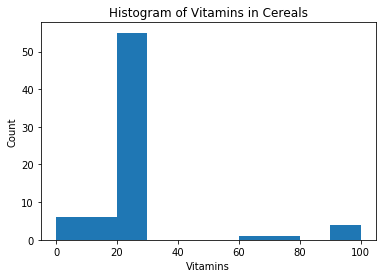

In [22]:
data=pd.read_csv('breakfast_cereals.csv')
plt.hist(data['Vitamins'],bins=10)

# Add a suitable title
plt.title('Histogram of Vitamins in Cereals')

# Adding suitable labels to the axes
plt.xlabel('Vitamins')
plt.ylabel('Count')

plt.show()

The above demonstrates how most cereals' vitamin level are clustered between the 20-30mg range. The outlier cereals could be used for those who have special dietary needs or lack vitamins in their normal diets.

In [24]:
#Generate Box Plots for Sugar values for each manufacturer

trace1 = go.Box(
    y=df1.Sugar,
    name='General Mills',
    marker=dict(color = 'rgba(12, 112, 212, 0.8)'),
    )
trace2 = go.Box(
    y=df2.Sugar,
    name='Kelloggs',
    marker=dict(color = 'rgba(11, 209, 208, 0.8)'),
    )
trace3 = go.Box(
    y=df3.Sugar,
    name='Nabisco',
    marker=dict(color = 'rgba(183, 98, 65, 0.8)'),
    )
trace4 = go.Box(
    y=df4.Sugar,
    name='Post',
    marker=dict(color = 'rgba(23, 50, 170, 0.8)'),
    )
trace5 = go.Box(
    y=df5.Sugar,
    name='Quaker Oats',
    marker=dict(color = 'rgba(123, 123, 10, 0.8)'),
    )
trace6 = go.Box(
    y=df6.Sugar,
    name='Ralston Purina',
    marker=dict(color = 'rgba(80, 198, 65, 0.8)'),
)

bp = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    title=go.layout.Title(
        text='Sugar Levels for Cereals',
        xref='paper',
        x=0
    ),
    xaxis = dict(
        title= 'Brands'),
    yaxis = dict(
        title= 'Sugar (g)'),
)
fig=dict(data = bp,layout=layout)
py.offline.iplot(fig)

The above box and whisker plot shows that most cereal manufacturers make cereals around with 6 to 8 grams of sugar per serving. For those who are concious about eating processed sugars they could look to a manufacturer like Nabisco for a solid healthey sugar free breakfast. Those people with a sweet tooth could get the sugary cereals from Kellogs or Post to satisfy their sweet tooth.

In [25]:
trace1 = go.Scatter3d(
    x=df1.Calories,
    y=df1.Sodium,
    z=df1.Potassium,
    name = 'General Mills',
    mode='markers',
    marker=dict(
        color= 'rgba(12, 112, 212, 0.8)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.5
        ),
        opacity=0.8
    )
)
trace2 = go.Scatter3d(
    x=df2.Calories,
    y=df2.Sodium,
    z=df2.Potassium,
    name = 'Kelloggs',
    mode='markers',
    marker=dict(
        color='rgba(11, 209, 208, 0.8)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace3 = go.Scatter3d(
    x=df3.Calories,
    y=df3.Sodium,
    z=df3.Potassium,
    name = 'Nabisco',
    mode='markers',
    marker=dict(
        color='rgba(183, 98, 65, 0.8)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace4 = go.Scatter3d(
    x=df4.Calories,
    y=df4.Sodium,
    z=df4.Potassium,
    name = 'Post',
    mode='markers',
    marker=dict(
        color='rgba(23, 50, 170, 0.8)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace5 = go.Scatter3d(
    x=df5.Calories,
    y=df5.Sodium,
    z=df5.Potassium,
    name = 'Quaker Oats',
    mode='markers',
    marker=dict(
        color='rgba(123, 123, 10, 0.8)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
trace6 = go.Scatter3d(
    x=df6.Calories,
    y=df6.Sodium,
    z=df6.Potassium,
    name = 'Ralston Purina',
    mode='markers',
    marker=dict(
        color='rgba(80, 198, 65, 0.8)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
        xaxis = dict(
            title= 'Calories (Cal)'),
        yaxis = dict(
            title= 'Sodium (mg)'),
        zaxis = dict(
            title='Potassium (mg)'),),
    title=go.layout.Title(
        text='Calories vs Sodium vs Potassium',
        xref='paper',
        x=0
    ),
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='Calories vs Sodium vs Potassium')

This graphs shows a relationship between micronutirents sodium and potassium compared to the calories in a serving of cereal. Nabisco again has a lot of cereals with very low sodium count which is an indication of a healthier cereal. The 3-D Graph can be manipulated to view from different angles and one can zoom in and out to get a better view of the data.